In [11]:
%matplotlib inline

import h5py
import deepdish as dd
import os
from skimage import io

import sys
sys.path.insert(0, '../spykes/')

def set_style():
    plt.style.use(['seaborn-white', 'seaborn-pastel'])
    plt.rc("font", family="Arial")
    #plt.style.use('./../spykes/mpl_configdir/spykes.mplstyle')  #to appear....
    
set_style()

# Lez simulate a neuron

In [80]:
n_spikes = 100000
firing_rate = 10. # [spks/s]
av_inter_spk_interval = 1/firing_rate # average interspike interval [ms]
print av_inter_spk_interval
#simulate
spike_times = np.cumsum(np.random.exponential(av_inter_spk_interval,n_spikes))

0.1


In [82]:
np.size(spike_times)/(spike_times[-1]-spike_times[0])

10.017356481519453

# Load package

In [73]:
from spykes import *

# Instantiate neuron

In [83]:
neuron_id ='faker'   #choose name for neuron (not necessary)
neuron = NEURON(spike_times, neuron_id)
neuron

<spykes.NEURON instance at 0x1100ff998>

In [84]:
print 'neuron %s has a firing rate of %.2f spks/s' % (neuron_id, neuron.firingrate)

neuron faker has a firing rate of 10.02 spks/s


# Load data

In [12]:
#Letz load some data
Monkey  = 'M1' #choose monkey
h5path = '/Volumes/JUICE/lab projects/V4_CNN/V4pydata/H5data/' + Monkey
fname = os.listdir(h5path)
fname = [session for session in fname if '.h5' in session]
thisfile = fname[0] #choose a session
dat = dd.io.load(h5path+'/'+ thisfile) #load

print 'loaded session: %s of monkey %s' % (thisfile[:-3], Monkey)
print "we have a dictionary with 2 fields: %s" % str(dat.keys())
print "and a total of %.0f neurons" % np.size(dat['spikes'].keys())

#letz get spikes and the list of neuron ids
spikes = dat['spikes']
neuron_list = dat['spikes'].keys()

loaded session: bucky090910 of monkey M1
we have a dictionary with 2 fields: ['eyes', 'spikes']
and a total of 142 neurons


In [13]:
#letz look at neuron number 50, for instance ;)
neuronid = neuron_list[50]
spikes = dat['spikes'][neuronid]

#letz do it!
neuron = NEURON(spikes)
neuron

<spykes.NEURON instance at 0x10ff7eb48>

In [14]:
# what's its name?
neuron.name

'neuron'

In [15]:
#oh, let's do it like this instead
neuron = NEURON(spikes, name = neuronid)
neuron.name

'3301'

In [16]:
#Ah
#what's itz firing rate?
neuron.firingrate

30.196534012735512

In [17]:
#nice, coincidently ;) we chose a neuron that spikes a lot

#letz get a PSTH for this neuron!, 
#first we need to an event to which we will aligh the trials to
#letz check what we have on our data
[i for i in dat['eyes'][0]]

['in_sac_blink',
 'imname',
 'fix_offset',
 'fix_offset_col',
 'badfix',
 'trial',
 'out_sac_blink',
 'out_sac_dur',
 'col',
 'fixation',
 'out_sac_pkvel',
 'in_sac_dur',
 'impath',
 'fix_onset',
 'fix_offset_row',
 'fix_onset_col',
 'in_sac_pkvel',
 'fix_onset_row',
 'row']

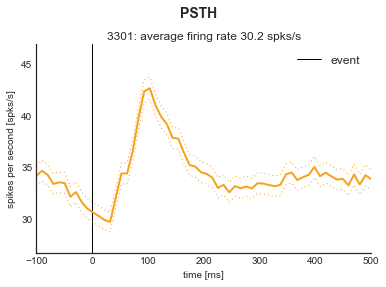

In [18]:
#hmmmm letz use fixation onset
#plt.style.use('./../spykes/mpl_configdir/spykes.mplstyle')
fix_onset_times = np.array([dat['eyes'][fix]['fix_onset'] for fix in dat['eyes']])
neuron.get_psth(fix_onset_times);

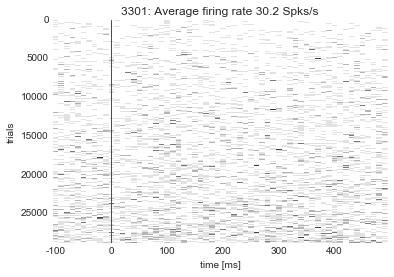

In [19]:
#how about rasters
neuron.get_raster(fix_onset_times);

In [20]:
# how about restricting the trials to certain conditions
# Letz get some features
fix_onset_times = np.array([dat['eyes'][fix]['fix_onset'] for fix in dat['eyes']])
fix_offset_times = np.array([dat['eyes'][fix]['fix_offset'] for fix in dat['eyes']])
fix_col = np.array([dat['eyes'][fix]['col'] for fix in dat['eyes']])
fix_row = np.array([dat['eyes'][fix]['col'] for fix in dat['eyes']])

features = {}
features['fix_duration'] = (fix_offset_times-fix_onset_times)*1000
features['in_screen_row'] = fix_row
features['in_screen_col'] = fix_col
features['a fake feature'] = [] 
features['yet another fake feature'] = [] 

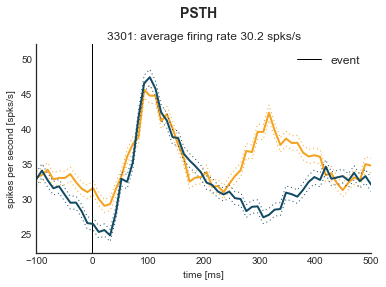

In [21]:
# Now that we have features Letz impose some restriction on which subset of trials we want to look at  
#######################################

# how about trials that are inside the screen
selectors = {}
selectors[0]= {}
selectors[0]['in_screen_row'] = [1, 1024]
selectors[0]['in_screen_col'] = [1, 768]
#and that have a fixation duration between [20,150]ms
selectors[0]['fix_duration'] = [80, 180]

#and letz compare that to those inside the screen with fixation duration between [200,1000]ms
selectors[1]= {}
selectors[1]['in_screen_row'] = [1, 1024]
selectors[1]['in_screen_col'] = [1, 768]
selectors[1]['fix_duration'] = [200, 1000]

neuron.get_psth(fix_onset_times, features, selectors);

bigger time window


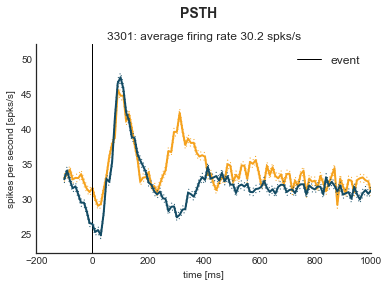

In [22]:
print 'bigger time window'
neuron.get_psth(fix_onset_times, features, selectors, window = [-100,1000]);

default binsizes are 10ms, letz try with 50ms


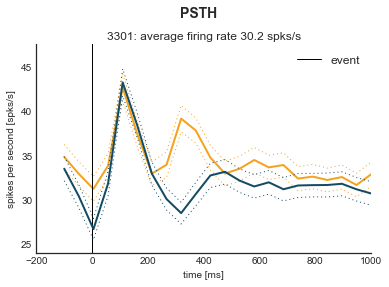

In [23]:
print 'default binsizes are 10ms, letz try with 50ms'
neuron.get_psth(fix_onset_times, features, selectors, window = [-100,1000], binsize=50);

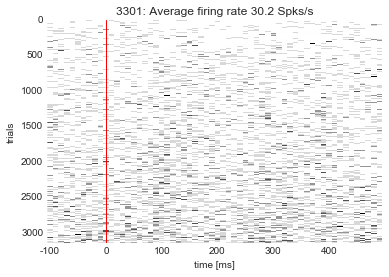

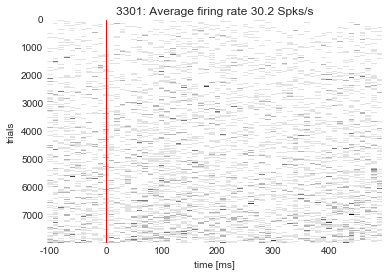

In [24]:
#and now some rasters
neuron.get_raster(fix_onset_times, features, selectors);

In [27]:
#and the psths
PSTHs = neuron.get_psth(fix_onset_times, features, selectors, plot=False)
PSTHs

{0: {'mean': array([ 33.18499682,  33.56643357,  34.32930706,  32.93070566,
          33.15321043,  33.12142403,  33.69357915,  32.51748252,
          31.59567705,  31.11888112,  31.69103624,  30.13350286,
          29.1481246 ,  29.40241577,  31.50031786,  33.40750159,
          36.17291799,  37.98474253,  38.97012079,  45.77240941,
          44.91417673,  44.91417673,  41.25874126,  42.27590591,
          40.273363  ,  37.88938334,  35.95041322,  32.6128417 ,
          33.18499682,  33.24856961,  33.97965671,  31.88175461,
          31.9771138 ,  31.08709472,  32.29497775,  33.40750159,
          34.23394787,  36.99936427,  36.84043229,  39.73299428,
          39.73299428,  42.46662428,  39.95549905,  37.85759695,
          38.77940242,  38.14367451,  38.1754609 ,  36.7768595 ,
          36.20470439,  36.39542276,  36.17291799,  33.53464717,
          33.82072473,  32.35855054,  31.40495868,  32.45390973,
          33.21678322,  32.80356008,  35.12396694,  34.90146217]),
  'sem': arr